In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

Datos de las capturas experimentales realizadas por video y analizadas por medio de la aplicacion Tracker.

In [138]:
datos_1 = pd.read_excel('intento_1.xlsx')
datos_2 = pd.read_excel('intento_2.xlsx')
datos_3 = pd.read_excel('intento_3.xlsx')
datos_4 = pd.read_excel('intento_4.xlsx')
datos_5 = pd.read_excel('intento_5.xlsx')
datos_6 = pd.read_excel('intento_6.xlsx')
datos_7 = pd.read_excel('intento_7.xlsx')
datos_8 = pd.read_excel('intento_8.xlsx')
datos_9 = pd.read_excel('intento_9.xlsx')
ace_t_1 = pd.read_excel('aceleracion.xlsx')

In [139]:
ace_te_1 = ace_t_1['a']
mean_ace = np.mean(ace_t_1)*100
mean_ace

np.float64(10.428273429824563)

In [140]:
y_1 = datos_1['x']
x_1 = datos_1['t']
x_2 = datos_2['t']
y_2 = datos_2['x']
x_3 = datos_3['t']
y_3 = datos_3['x']
x_4 = datos_4['t']
y_4 = datos_4['x']
x_5 = datos_7['t']
y_5 = datos_7['x']
x_6 = datos_5['t']
y_6 = datos_5['x']
x_7 = datos_8['t']
y_7 = datos_8['x']
x_8 = datos_9['t']
y_8 = datos_9['x']
x_9 = datos_6['t']
y_9 = datos_6['x']

#masas = [5.9,15.8,25.6,25.8,35.7,55.7,65.6,75.5,105.2]


In [141]:
t_1 = np.around(np.max(x_1),decimals=1)
t_2 = np.around(np.max(x_2),decimals=1)
t_3 = np.around(np.max(x_3),decimals=1)
t_4 = np.around(np.max(x_4),decimals=1)
t_5 = np.around(np.max(x_5),decimals=1)
t_6 = np.around(np.max(x_6),decimals=1)
t_7 = np.around(np.max(x_7),decimals=1)
t_8 = np.around(np.max(x_8),decimals=1)
t_9 = np.around(np.max(x_9),decimals=1)
x_1_max = np.max(y_1)
x_2_max = np.max(y_2)
x_3_max = np.max(y_3)
x_4_max = np.max(y_4)
x_5_max = np.max(y_5)
x_6_max = np.max(y_6)
x_7_max = np.max(y_7)
x_8_max = np.max(y_8)
x_9_max = np.max(y_9)
masas = [5.9,15.8,25.6,25.8,35.7,55.7,65.6,75.5,105.2]

tabla = pd.DataFrame({'video': [1,2,3,4,5,6,7,8,9] ,
                      'masa (g)': masas ,
                      'tiempo (s)': [t_1, t_2, t_3, t_4, t_5, t_6, t_7, t_8, t_9], 
                      'distancia(m)': [x_1_max, x_2_max, x_3_max, x_4_max, x_5_max, x_6_max, x_7_max, x_8_max, x_9_max]})
tabla

,video,masa (g),tiempo (s),distancia(m)
0,1,5.9,3.9,0.655941
1,2,15.8,1.6,0.647536
2,3,25.6,1.3,0.678306
3,4,25.8,1.3,0.683692
4,5,35.7,1.1,0.669456
5,6,55.7,0.9,0.673460
6,7,65.6,0.8,0.671747
7,8,75.5,0.8,0.664268
8,9,105.2,0.7,0.669349


In [142]:
#Media de la distancia
#media_x = np.mean(tabla['distancia(m)'])*100
media_x = 68

La media de la distancia sería: $\bar{x}=0.67m$ 

ahora debemos calcular la aceleracio experimental, teniendo en cuenta la formula:
$$
a_{exp}=2\frac{d}{T^2}
$$

In [143]:
#aceleracion experimental
def aceleracion(x,t):
    return (2*x)/(t**2)


ahora calculamos las cantidades adimensinoales $\gamma$ y $z$, donde:
$$
\gamma = \frac{M_1}{M_2}
$$
$$
z=\frac{a_{exp}}{g}\left(\frac{M_1+M_2}{M_2}\right)
$$
siendo la gravedad $g=980\frac{m}{s^2}$

In [144]:
def gamma(masa):
    return 150/masa

def z(aceleracion,masa):
    return (aceleracion/980)*((150+masa)/masa)

In [145]:
aceleracion_1 = aceleracion(media_x,t_1)
aceleracion_2 = aceleracion(media_x,t_2)
aceleracion_3 = aceleracion(media_x,t_3)
aceleracion_4 = aceleracion(media_x,t_4)
aceleracion_5 = aceleracion(media_x,t_5)
aceleracion_6 = aceleracion(media_x,t_6)
aceleracion_7 = aceleracion(media_x,t_7)
aceleracion_8 = aceleracion(media_x,t_8)
aceleracion_9 = aceleracion(media_x,t_9)

gamma_1 = gamma(masas[0])
gamma_2 = gamma(masas[1])
gamma_3 = gamma(masas[2])
gamma_4 = gamma(masas[3])
gamma_5 = gamma(masas[4])
gamma_6 = gamma(masas[5])
gamma_7 = gamma(masas[6])
gamma_8 = gamma(masas[7])
gamma_9 = gamma(masas[8])

z_1 = z(aceleracion_1,masas[0])
z_2 = z(aceleracion_2,masas[1])
z_3 = z(aceleracion_3,masas[2])
z_4 = z(aceleracion_4,masas[3])
z_5 = z(aceleracion_5,masas[4])
z_6 = z(aceleracion_6,masas[5])
z_7 = z(aceleracion_7,masas[6])
z_8 = z(aceleracion_8,masas[7])
z_9 = z(aceleracion_9,masas[8])

In [146]:
tabla_2 = pd.DataFrame({'video': [1,2,3,4,5,6,7,8,9] , 'masa': [masas[0],masas[1],masas[2],masas[3],masas[4],masas[5],masas[6],masas[7],masas[8]],
                        'aceleración': [aceleracion_1,aceleracion_2, aceleracion_3, aceleracion_4, aceleracion_5, aceleracion_6, aceleracion_7, aceleracion_8, aceleracion_9], 
                        'gamma': [gamma_1, gamma_2, gamma_3, gamma_4, gamma_5, gamma_6, gamma_7, gamma_8, gamma_9], 
                        'z': [z_1, z_2, z_3, z_4, z_5, z_6, z_7, z_8, z_9]})
tabla_2

,video,masa,aceleración,gamma,z
0,1,5.9,8.941486,25.423729,0.241089
1,2,15.8,53.125000,9.493671,0.568853
2,3,25.6,80.473373,5.859375,0.563262
3,4,25.8,80.473373,5.813953,0.559532
4,5,35.7,112.396694,4.201681,0.596583
5,6,55.7,167.901235,2.692998,0.632713
6,7,65.6,212.500000,2.286585,0.712652
7,8,75.5,212.500000,1.986755,0.647638
8,9,105.2,277.551020,1.425856,0.687039


In [152]:
def func(s,a,b):
	return a*s + b

params, params_covariance = curve_fit(func, tabla_2['gamma'], tabla_2['z'])

a_fit, b_fit = params	

gamma_smooth = np.linspace(min(tabla_2['gamma']), max(tabla_2['gamma']), 100)
z_smooth = func(gamma_smooth, a_fit, b_fit)

In [159]:
def regresion_1(t,gamma):
  slope, intercept, r, p, std_err = stats.linregress(t,gamma)
  def myfunc(x):
    return slope * x + intercept
  
  
  mymodel = list(map(myfunc, t))
  
  r_squared = r**2
  
  print('slope:', slope)
  print('intercept:', intercept)
  print('r:', r)
  print('R^2:', r_squared)
  print('p:', p)
  print('std_err:', std_err)
  return mymodel

reg = regresion_1(tabla_2['gamma'],tabla_2['z'])


slope: -0.017866209664736288
intercept: 0.6963076101673936
r: -0.9726467748593877
R^2: 0.9460417486443684
p: 1.0850770779278168e-05
std_err: 0.0016127133780758814


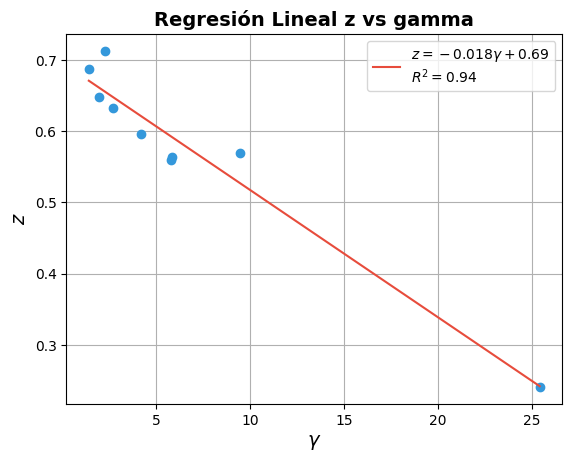

In [178]:
fig_2 = plt.figure()
plt.plot(tabla_2['gamma'],tabla_2['z'],'o', color=(52/255,152/255,219/255))
#plt.plot(gamma_smooth,z_smooth, color='green')
plt.plot(tabla_2['gamma'],reg, color=(231/255,76/255,60/255), label=r'$z = -0.018\gamma + 0.69$' + '\n' + r'$R^2 = 0.94$')
plt.xlabel(r'$\gamma$', fontsize=14, fontweight='bold')
plt.ylabel(r'$z$', fontsize=14, fontweight='bold')
plt.title('Regresión Lineal z vs gamma',fontsize=14, fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()


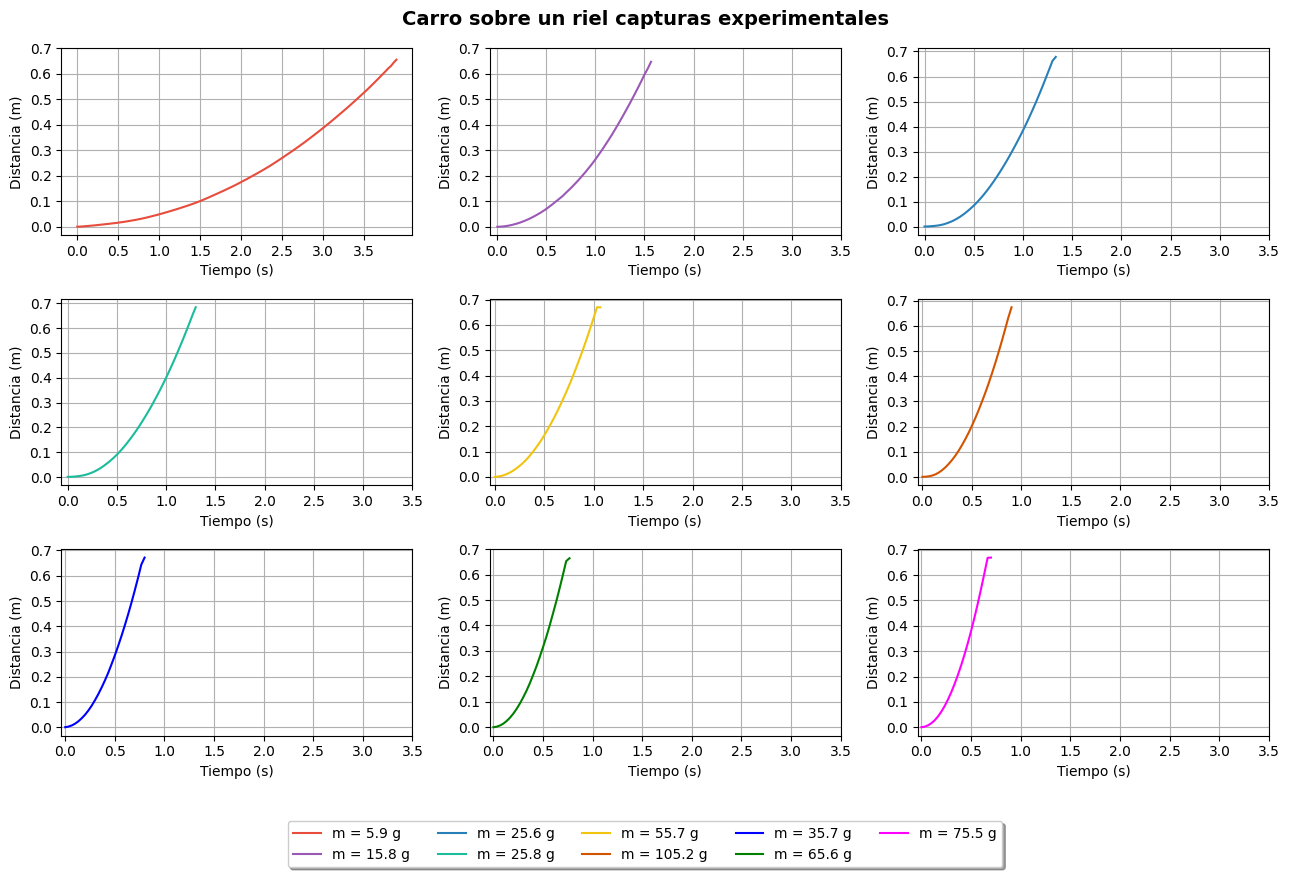

In [148]:
# rel_vectores
fig = plt.figure(figsize=(13, 8), layout='tight')
fig.suptitle('Carro sobre un riel capturas experimentales', fontsize=14, fontweight='bold')
spec = fig.add_gridspec(3,3)
ax1 =fig.add_subplot(spec[0,0])
ax1.plot(x_1, y_1, color=(231/255,76/255,60/255), label='m = 5.9 g')
ax1.set_xticks(np.arange(0, 4, 0.5))
ax1.set_yticks(np.arange(0, 0.8, 0.1))
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Distancia (m)')
ax1.grid(True)
ax2 = fig.add_subplot(spec[0,1])
ax2.plot(x_2, y_2, color=(155/255, 89/255, 182/255), label='m = 15.8 g')
ax2.set_xticks(np.arange(0, 4, 0.5))
ax2.set_yticks(np.arange(0, 0.8, 0.1))
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Distancia (m)')
ax2.grid(True)
ax3 = fig.add_subplot(spec[0,2])
ax3.plot(x_3, y_3, color='#2980b9', label='m = 25.6 g')
ax3.set_xticks(np.arange(0, 4, 0.5))
ax3.set_yticks(np.arange(0, 0.8, 0.1))
ax3.set_xlabel('Tiempo (s)')
ax3.set_ylabel('Distancia (m)')
ax3.grid(True)
ax4 = fig.add_subplot(spec[1,0])
ax4.plot(x_4, y_4, color='#1abc9c', label='m = 25.8 g')
ax4.set_xticks(np.arange(0, 4, 0.5))
ax4.set_yticks(np.arange(0, 0.8, 0.1))
ax4.set_xlabel('Tiempo (s)')
ax4.set_ylabel('Distancia (m)')
ax4.grid(True)
ax5 =fig.add_subplot(spec[1,1])
ax5.plot(x_5, y_5, color='#f1c40f', label='m = 55.7 g')
ax5.set_xticks(np.arange(0, 4, 0.5))
ax5.set_yticks(np.arange(0, 0.8, 0.1))
ax5.set_xlabel('Tiempo (s)')
ax5.set_ylabel('Distancia (m)')
ax5.grid(True)
ax6 =fig.add_subplot(spec[1,2])
ax6.plot(x_6, y_6, color='#d35400', label='m = 105.2 g')
ax6.set_xticks(np.arange(0, 4, 0.5))
ax6.set_yticks(np.arange(0, 0.8, 0.1))
ax6.set_xlabel('Tiempo (s)')
ax6.set_ylabel('Distancia (m)')
ax6.grid(True)
ax7 = fig.add_subplot(spec[2,0])
ax7.plot(x_7, y_7, color='blue', label='m = 35.7 g')
ax7.set_xticks(np.arange(0, 4, 0.5))
ax7.set_yticks(np.arange(0, 0.8, 0.1))
ax7.set_xlabel('Tiempo (s)')
ax7.set_ylabel('Distancia (m)')
ax7.grid(True)
ax8 = fig.add_subplot(spec[2,1])
ax8.plot(x_8, y_8, color='green', label='m = 65.6 g')
ax8.set_xticks(np.arange(0, 4, 0.5))
ax8.set_yticks(np.arange(0, 0.8, 0.1))
ax8.set_xlabel('Tiempo (s)')
ax8.set_ylabel('Distancia (m)')
ax8.grid(True)
ax9 = fig.add_subplot(spec[2,2])
ax9.plot(x_9, y_9, color='magenta', label='m = 75.5 g')
ax9.set_xticks(np.arange(0, 4, 0.5))
ax9.set_yticks(np.arange(0, 0.8, 0.1))
ax9.set_xlabel('Tiempo (s)')
ax9.set_ylabel('Distancia (m)')
ax9.grid(True)
fig.legend(loc='lower center',bbox_to_anchor=(0.5, -0.1), ncol=5,shadow=True, fancybox=True)
# plt.savefig('relacion_vectores.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('carro_sobre_riel_datos_experimentales.png', dpi = 300, bbox_inches = 'tight')
plt.show()